In [354]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [355]:
#!pip install -U seaborn

In [356]:
cv=pd.read_csv("CurrentVoltage.csv")

In [357]:
cv.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
cv.columns

Index(['DeviceTimeStamp', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12',
       'VL23', 'VL31', 'INUT'],
      dtype='object')

In [359]:
pf=pd.read_csv("PowerFactor.csv")

In [360]:
pf.head()

,DeviceTimeStamp,PFL1,PFL2,PFL3,Avg_PF,Sum_PF,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
0,2019-06-25T12:39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-25T12:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-25T13:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:50,1.0,1.0,1.0,1.0,-92.1,49.9,1.7,1.7,1.7,0.0,0.0,0.0,92.7,0.0,0.0
4,2019-06-27T10:51,1.0,1.0,1.0,1.0,-29.2,50.0,1.6,1.6,1.6,0.0,0.0,0.0,92.7,0.0,0.0


In [361]:
pf.columns

Index(['DeviceTimeStamp', 'PFL1', 'PFL2', 'PFL3', 'Avg_PF', 'Sum_PF', 'FRQ',
       'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1',
       'MDIL2', 'MDIL3'],
      dtype='object')

# Data merging

In [362]:
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'])
pf['DeviceTimeStamp'] = pd.to_datetime(pf['DeviceTimeStamp'])

In [363]:
cv.index = cv['DeviceTimeStamp']
pf.index = pf['DeviceTimeStamp']

In [364]:
#tol = pd.Timedelta('5 second')
final=pd.merge_asof(left=cv,right=pf,right_index=True,left_index=True,direction='nearest')

In [365]:
final.head()

,DeviceTimeStamp_x,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,...,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
DeviceTimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-06-25 13:06:00,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-27 10:49:00,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,...,49.9,1.7,1.7,1.7,0.0,0.0,0.0,92.7,0.0,0.0
2019-06-27 10:51:00,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,...,49.9,1.7,1.7,1.0,0.0,0.0,0.0,92.7,0.0,0.0
2019-06-27 10:52:00,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.9,1.6,1.6,1.6,0.0,0.0,0.0,92.7,0.0,0.0
2019-06-27 10:52:00,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.9,1.6,1.6,1.6,0.0,0.0,0.0,92.7,0.0,0.0


In [366]:
final.describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.00000,19352.000000,19352.000000,19352.000000,...,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000
mean,241.068019,240.515456,239.912293,73.710857,58.970592,83.226555,379.47530,378.526261,379.969311,26.315187,...,49.933227,1.823450,1.804744,1.830943,11.226369,11.624163,8.633991,148.676406,128.648093,160.323946
std,9.536380,9.801129,8.846213,41.256800,40.463867,43.609360,119.96308,119.417113,120.074752,15.103268,...,0.882041,0.565684,0.585431,0.576176,6.138203,6.055332,4.532951,49.090375,63.022985,61.756505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235.400000,235.100000,235.100000,46.775000,31.500000,56.300000,400.70000,401.300000,401.900000,16.800000,...,49.900000,1.400000,1.400000,1.400000,7.000000,7.900000,6.000000,114.100000,95.400000,148.600000
50%,242.700000,242.100000,241.100000,69.500000,50.200000,80.200000,417.80000,416.300000,417.900000,25.600000,...,50.000000,1.800000,1.700000,1.800000,11.100000,11.200000,8.000000,152.300000,135.200000,175.800000
75%,247.500000,246.700000,245.300000,100.100000,82.500000,113.900000,427.50000,425.300000,427.600000,35.700000,...,50.000000,2.200000,2.200000,2.200000,15.300000,15.600000,11.400000,195.000000,170.000000,204.100000
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.50000,444.800000,447.300000,145.800000,...,50.200000,6.200000,6.500000,6.300000,30.600000,65.900000,33.100000,234.000000,234.700000,230.500000


# As per the plot, the voltage is varies between 220 to 250, variation due to demand in the load

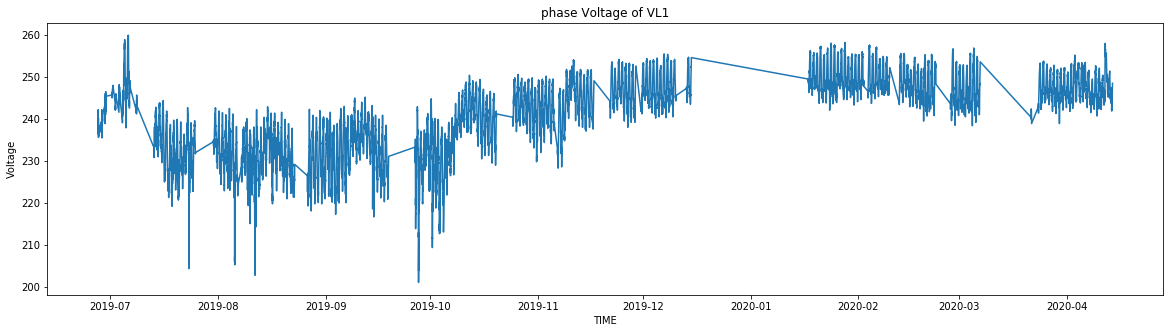

In [367]:


plt.figure(figsize=(20,5))

plt.plot(final[(final['VL1']<260)&(final['VL1']>200)].VL1)
plt.title("phase Voltage of VL1")
plt.xlabel("TIME")
plt.ylabel("Voltage")
plt.show()


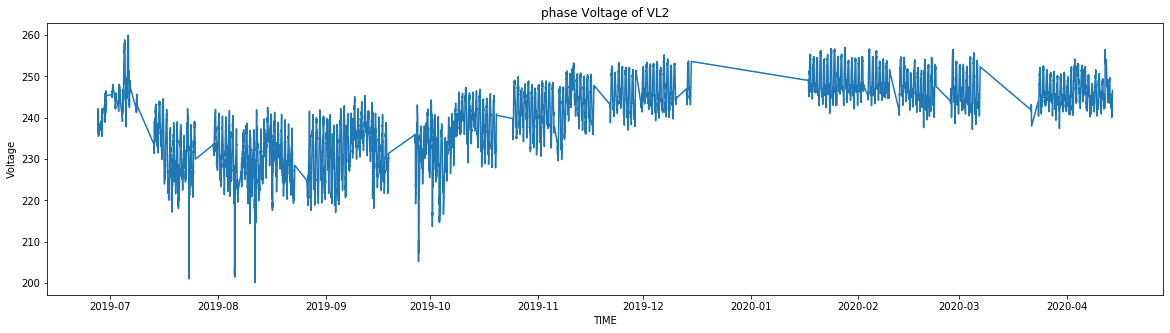

In [368]:

plt.figure(figsize=(20,5))
plt.plot(final[(final['VL2']<260)&(final['VL2']>200)].VL2)
plt.title("phase Voltage of VL2")
plt.xlabel("TIME")
plt.ylabel("Voltage")
plt.show()


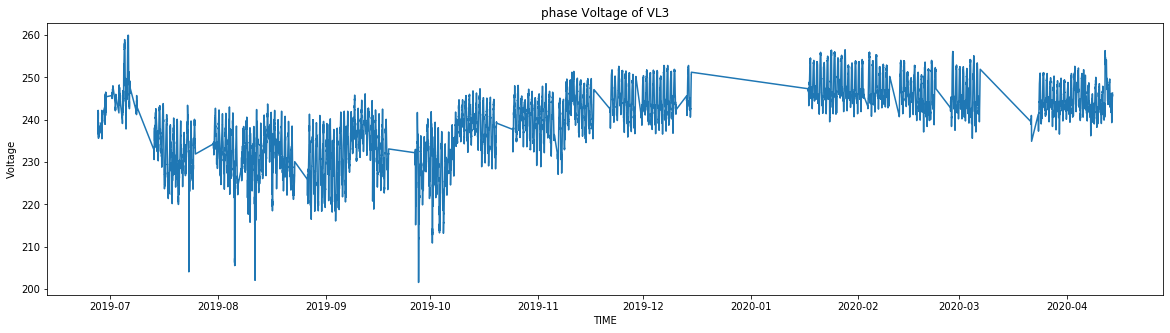

In [369]:

plt.figure(figsize=(20,5))

plt.plot(final[(final['VL3']<260)&(final['VL3']>200)].VL3)
plt.title("phase Voltage of VL3")
plt.xlabel("TIME")
plt.ylabel("Voltage")
plt.show()


# As per below graph, if demand (load) increases the input draw current

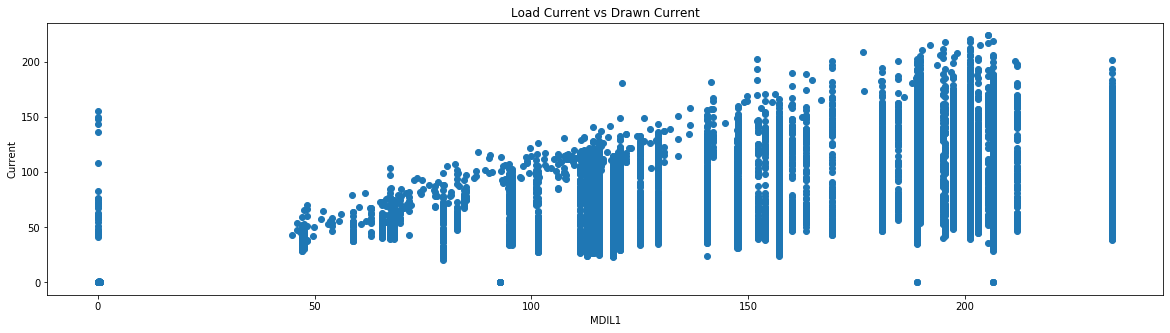

In [370]:
plt.figure(figsize=(20,5))
plt.scatter(final.MDIL1, final.IL1)
plt.title("Load Current vs Drawn Current")
plt.xlabel("MDIL1")
plt.ylabel("Current")
plt.show()

# As per below graph, if demand (load) increases the input voltage remain same . Different country has different voltage standard, Ex: In India 240V (Phase voltage)

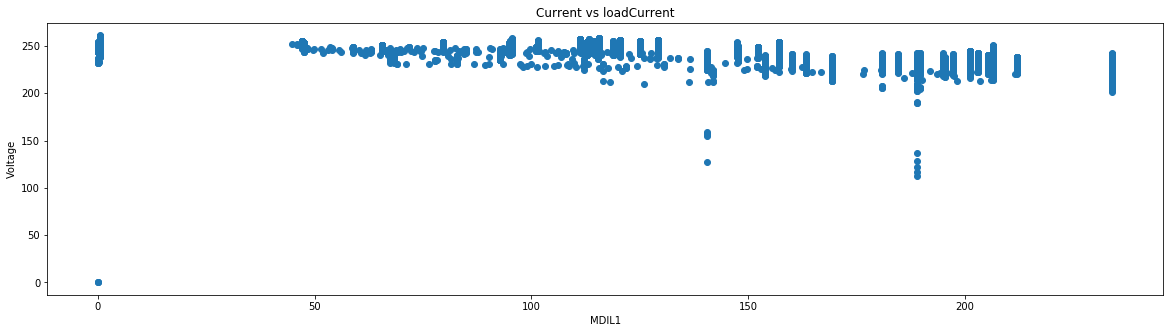

In [371]:
plt.figure(figsize=(20,5))
plt.scatter(final.MDIL1, final.VL1)
plt.title("Current vs loadCurrent")
plt.xlabel("MDIL1")
plt.ylabel("Voltage")
plt.show()

# Feature extraction

# Finding input power of each indivual lines using formula power=3*V_Phase*I_phase*power_factor

In [372]:
final=final.assign(PowerL1=lambda x: (3*final['VL1']* final['IL1']* final['PFL1'] ))

In [373]:
final=final.assign(PowerL2=lambda x: (3*final['VL2']* final['IL2']* final['PFL2'] ))

In [374]:
final=final.assign(PowerL3=lambda x: (3*final['VL3']* final['IL3']* final['PFL3'] ))

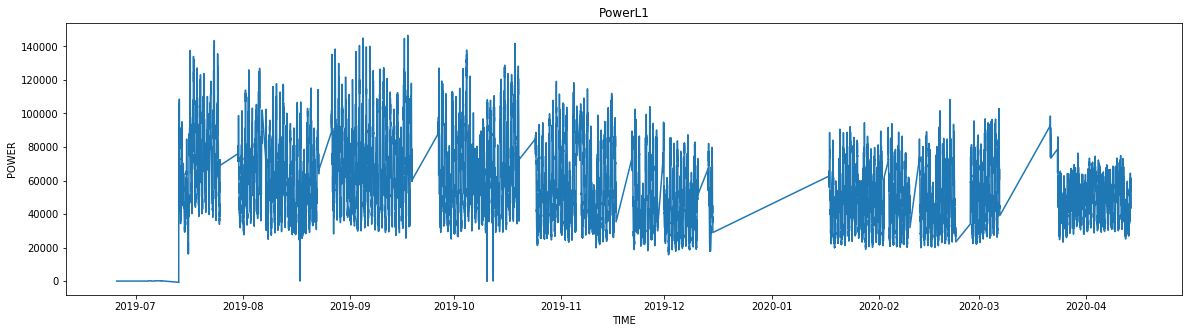

In [375]:

plt.figure(figsize=(20,5))

plt.plot(final.PowerL1)
plt.title("PowerL1")
plt.xlabel("TIME")
plt.ylabel("POWER")
plt.show()

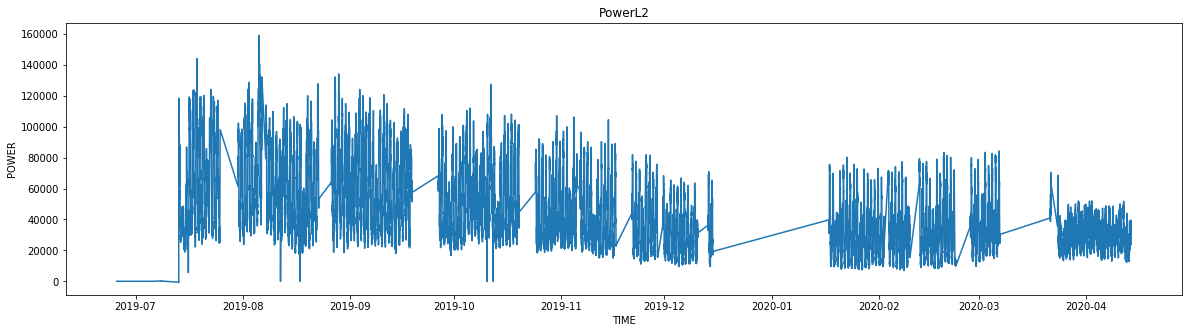

In [376]:
plt.figure(figsize=(20,5))

plt.plot(final.PowerL2)
plt.title("PowerL2")
plt.xlabel("TIME")
plt.ylabel("POWER")
plt.show()

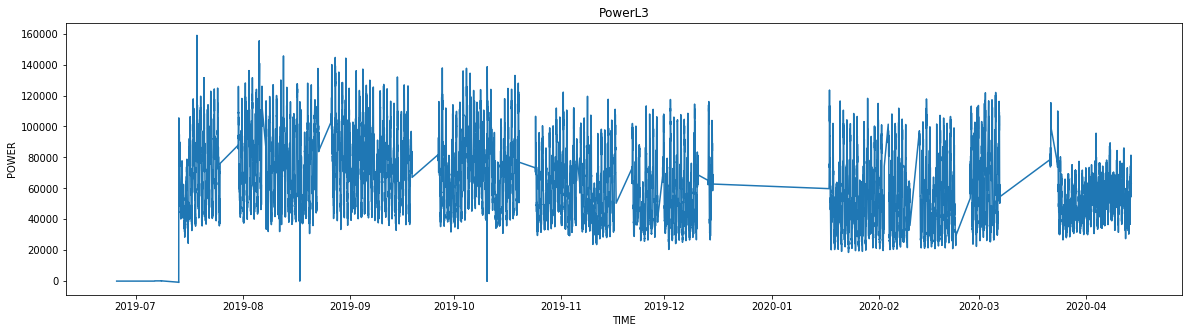

In [377]:
plt.figure(figsize=(20,5))

plt.plot(final.PowerL3)
plt.title("PowerL3")
plt.xlabel("TIME")
plt.ylabel("POWER")
plt.show()

In [378]:
final.columns

Index(['DeviceTimeStamp_x', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12',
       'VL23', 'VL31', 'INUT', 'DeviceTimeStamp_y', 'PFL1', 'PFL2', 'PFL3',
       'Avg_PF', 'Sum_PF', 'FRQ', 'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1',
       'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2',
       'PowerL3'],
      dtype='object')

# From the corr: Power drawn from the system depends on the load demands, as per data the max load demand is directly propotional to the input power, corr shows 50% due to the maxmum load is recoded over the period.

In [379]:
final[['MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2',
       'PowerL3']].corr()

,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
MDIL1,1.000000,0.870190,0.840769,0.531830,0.566897,0.530470
MDIL2,0.870190,1.000000,0.932935,0.581646,0.624160,0.603736
MDIL3,0.840769,0.932935,1.000000,0.614714,0.591442,0.646918
PowerL1,0.531830,0.581646,0.614714,1.000000,0.900415,0.917151
PowerL2,0.566897,0.624160,0.591442,0.900415,1.000000,0.889177
PowerL3,0.530470,0.603736,0.646918,0.917151,0.889177,1.000000


# Maximum and minimum phase voltage:

In [380]:
print("Maximum phase voltage of Line 1   =    ",final.VL1.max())
print("Maximum phase voltage of Line 2   =    ",final.VL2.max())
print("Maximum phase voltage of Line 3   =    ",final.VL3.max())

Maximum phase voltage of Line 1   =     261.2
Maximum phase voltage of Line 2   =     261.3
Maximum phase voltage of Line 3   =     261.3


In [381]:
print("Maximum phase voltage of Line 1   =    ",final.VL1.min())
print("Maximum phase voltage of Line 2   =    ",final.VL2.min())
print("Maximum phase voltage of Line 3   =    ",final.VL3.min())

Maximum phase voltage of Line 1   =     0.0
Maximum phase voltage of Line 2   =     0.0
Maximum phase voltage of Line 3   =     0.0


In [382]:
final.columns

Index(['DeviceTimeStamp_x', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12',
       'VL23', 'VL31', 'INUT', 'DeviceTimeStamp_y', 'PFL1', 'PFL2', 'PFL3',
       'Avg_PF', 'Sum_PF', 'FRQ', 'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1',
       'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2',
       'PowerL3'],
      dtype='object')

In [383]:
final.drop_duplicates(inplace=True)
final.dropna(inplace=True)
final.sort_index(axis = 0)
final.drop('DeviceTimeStamp_x', axis=1, inplace=True)

In [384]:
final.columns

Index(['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT', 'DeviceTimeStamp_y', 'PFL1', 'PFL2', 'PFL3', 'Avg_PF', 'Sum_PF',
       'FRQ', 'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3',
       'MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3'],
      dtype='object')

# outlier detecting

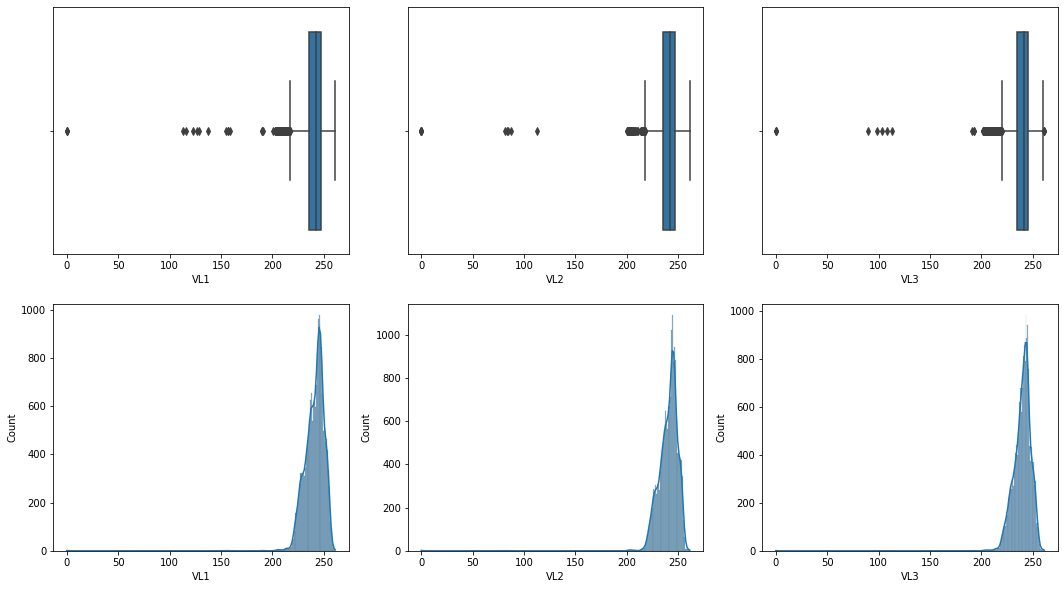

In [385]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=final, x='VL1')
sns.boxplot(ax=axes[0, 1], data=final, x='VL2')
sns.boxplot(ax=axes[0, 2], data=final, x='VL3')


#sns.boxplot(ax=axes[0, 1], final['VL1'])
sns.histplot(ax=axes[1, 0], data = final['VL1'], kde = True)
sns.histplot(ax=axes[1, 1], data = final['VL2'], kde = True)
sns.histplot(ax=axes[1, 2], data = final['VL3'], kde = True)

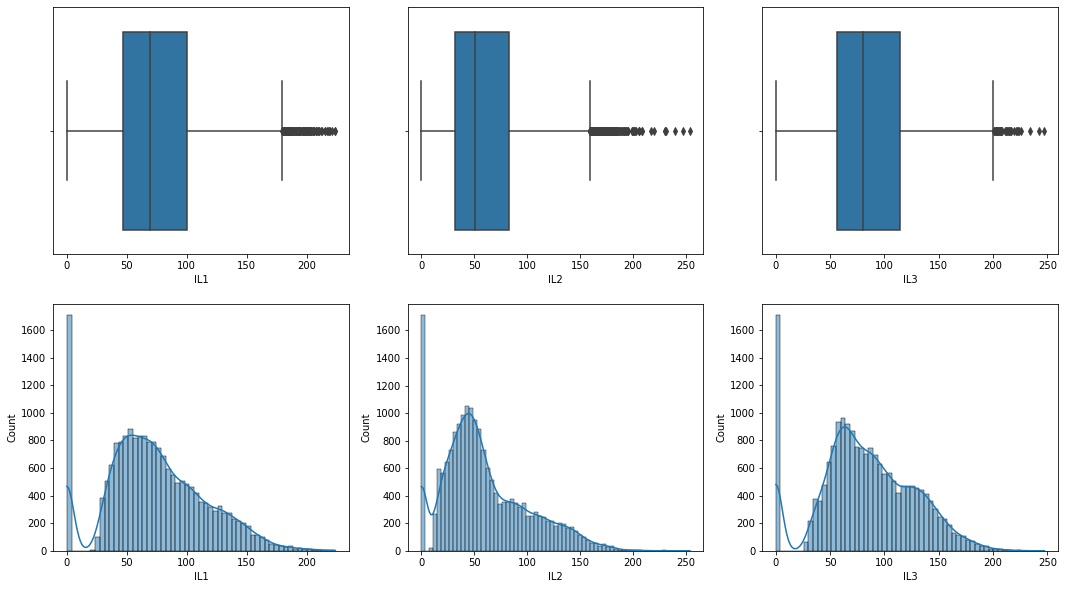

In [386]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=final, x='IL1')
sns.boxplot(ax=axes[0, 1], data=final, x='IL2')
sns.boxplot(ax=axes[0, 2], data=final, x='IL3')


#sns.boxplot(ax=axes[0, 1], final['VL1'])
sns.histplot(ax=axes[1, 0], data = final['IL1'], kde = True)
sns.histplot(ax=axes[1, 1], data = final['IL2'], kde = True)
sns.histplot(ax=axes[1, 2], data = final['IL3'], kde = True)

In [387]:
final

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
DeviceTimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.7,0.0,0.0,0.0,92.7,0.0,0.0,0.0000,0.0000,0.0000
2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,92.7,0.0,0.0,0.0000,0.0000,0.0000
2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,0.0,0.0,0.0,92.7,0.0,0.0,0.0000,0.0000,0.0000
2019-06-27 10:53:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,0.0,0.0,0.0,92.7,0.0,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13 23:30:00,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0,...,1.6,10.6,7.3,8.4,95.4,70.1,116.3,57812.8320,32661.5772,61565.0658
2020-04-13 23:45:00,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1,...,1.5,10.4,6.3,8.0,95.4,70.1,116.3,56440.6920,29956.1220,59981.3856
2020-04-14 00:00:00,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8,...,1.4,10.3,5.7,8.6,95.4,70.1,116.3,56963.7684,26558.4060,54532.2960


In [388]:
col=[ 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12',
       'VL23', 'VL31', 'INUT', 'PFL1', 'PFL2', 'PFL3',
       'Avg_PF', 'Sum_PF', 'FRQ', 'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1',
       'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2',
       'PowerL3']

In [389]:
pd.DataFrame(final).describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
count,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,...,19320.000000,19320.000000,19320.00000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000
mean,241.069151,240.515538,239.911351,73.832935,59.068256,83.364394,380.103830,379.153219,380.598659,26.358773,...,1.830973,11.244788,11.64324,8.648126,148.773918,128.861175,160.589493,52010.884843,40862.518701,57871.586788
std,9.543768,9.808790,8.853003,41.181669,40.426082,43.513627,119.063255,118.517265,119.173345,15.077719,...,0.576567,6.126516,6.04211,4.523310,49.068065,62.857110,61.461670,27766.170633,27167.412953,29302.468151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-823.435200,-740.678400,-864.376500
25%,235.400000,235.100000,235.100000,46.900000,31.600000,56.400000,400.800000,401.400000,402.000000,16.900000,...,1.400000,7.100000,7.90000,6.000000,114.100000,98.900000,148.600000,34001.213400,22311.583200,39907.890000
50%,242.700000,242.100000,241.100000,69.600000,50.200000,80.300000,417.800000,416.300000,418.000000,25.600000,...,1.800000,11.100000,11.20000,8.000000,152.300000,135.200000,175.800000,49840.668900,35259.411000,56552.445300
75%,247.500000,246.700000,245.300000,100.100000,82.600000,114.025000,427.500000,425.300000,427.600000,35.800000,...,2.200000,15.300000,15.60000,11.400000,195.000000,170.000000,204.100000,70824.703050,57631.340250,78678.092250
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.500000,444.800000,447.300000,145.800000,...,6.300000,30.600000,65.90000,33.100000,234.000000,234.700000,230.500000,146627.712000,159074.150400,158939.134200


# outlier handing

In [390]:

final.reset_index(inplace=True)

newFinal=final[(np.abs(stats.zscore(final[col])) < 3).all(axis=1)]

In [391]:
#before feature scaling
pd.DataFrame(newFinal).describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
count,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,...,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000
mean,241.335845,240.730327,240.024091,79.961137,63.768455,90.388763,417.277444,416.130709,417.796982,28.628556,...,1.802536,12.291952,12.747100,9.495076,156.196335,141.115861,176.174115,56468.028361,44197.822887,62859.563477
std,8.734369,8.511957,7.957436,34.647348,36.414523,35.601199,15.066762,13.978882,14.684355,12.756871,...,0.556504,5.340218,5.085905,3.825192,42.405595,50.364198,36.864977,23000.040654,24388.027550,23674.453754
min,212.600000,213.400000,213.500000,0.000000,0.000000,0.000000,367.700000,370.700000,368.400000,0.000000,...,0.200000,0.000000,0.000000,0.000000,44.700000,25.800000,55.600000,0.000000,0.000000,0.000000
25%,234.900000,234.600000,234.700000,52.600000,36.900000,62.100000,406.300000,406.600000,407.200000,19.400000,...,1.400000,8.400000,8.700000,6.600000,115.600000,104.100000,153.200000,37957.669200,26049.883500,43681.924800
50%,243.200000,242.600000,241.300000,73.200000,53.300000,84.700000,420.600000,418.600000,420.600000,27.000000,...,1.700000,11.700000,11.900000,8.400000,157.100000,135.200000,175.800000,52390.476600,37392.710400,59533.029000
75%,247.900000,247.000000,245.500000,102.300000,85.500000,116.400000,428.400000,426.000000,428.600000,36.600000,...,2.200000,15.900000,16.200000,11.900000,197.200000,175.700000,204.100000,72341.704575,59875.474725,80318.133900
max,258.000000,257.000000,256.400000,196.300000,180.100000,207.900000,446.500000,444.800000,447.300000,71.500000,...,3.500000,29.200000,29.700000,22.200000,234.000000,234.700000,230.500000,130868.179200,122240.448000,138703.496400


# Feature Scaling

In [392]:
#scaler=MinMaxScaler()
scaler=StandardScaler()
newFinal1=scaler.fit_transform(newFinal.loc[:,col])

In [393]:
#after scling
newFinal1= pd.DataFrame(newFinal1, columns=col)
pd.DataFrame(newFinal1).describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
count,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,...,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04,1.699800e+04
mean,-4.920186e-15,-1.732073e-15,8.228439e-16,8.548809e-16,-1.167733e-15,1.068985e-15,-1.791105e-15,2.012163e-15,-3.437825e-15,3.929607e-16,...,3.399250e-15,-7.104859e-16,-1.668460e-14,-9.579935e-16,3.775341e-14,-9.576805e-14,6.043169e-14,-1.672611e-15,1.835003e-15,1.095246e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,...,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-3.290071e+00,-3.210910e+00,-3.333344e+00,-2.307925e+00,-1.751233e+00,-2.538999e+00,-3.290614e+00,-3.250049e+00,-3.364018e+00,-2.244234e+00,...,-2.879731e+00,-2.301838e+00,-2.506432e+00,-2.482321e+00,-2.629361e+00,-2.289707e+00,-3.270792e+00,-2.455200e+00,-1.812329e+00,-2.655242e+00
25%,-7.368632e-01,-7.202231e-01,-6.690909e-01,-7.897269e-01,-7.378717e-01,-7.946248e-01,-7.286082e-01,-6.818134e-01,-7.216724e-01,-7.234397e-01,...,-7.233501e-01,-7.288217e-01,-7.957716e-01,-7.568668e-01,-9.573626e-01,-7.349854e-01,-6.232146e-01,-8.048205e-01,-7.441550e-01,-8.100801e-01
50%,2.134338e-01,2.196590e-01,1.603464e-01,-1.951473e-01,-2.874887e-01,-1.597960e-01,2.205287e-01,1.766495e-01,1.908903e-01,-1.276649e-01,...,-1.842548e-01,-1.108512e-01,-1.665632e-01,-2.862884e-01,2.131067e-02,-1.174651e-01,-1.014854e-02,-1.772898e-01,-2.790432e-01,-1.405157e-01
75%,7.515538e-01,7.365941e-01,6.881702e-01,6.447686e-01,5.967999e-01,7.306496e-01,7.382397e-01,7.060350e-01,7.357038e-01,6.248929e-01,...,7.142372e-01,6.756568e-01,6.789356e-01,6.287252e-01,9.669684e-01,6.867012e-01,7.575403e-01,6.901789e-01,6.428611e-01,7.374651e-01
max,1.907939e+00,1.911447e+00,2.057998e+00,3.357899e+00,3.194741e+00,3.300863e+00,1.939595e+00,2.050960e+00,2.009205e+00,3.360754e+00,...,3.050317e+00,3.166265e+00,3.333409e+00,3.321480e+00,1.834804e+00,1.858203e+00,1.473688e+00,3.234879e+00,3.200133e+00,3.203713e+00


In [394]:
newFinal1

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
0,-1.023097,-0.919948,-0.995839,1.504889,2.318691,1.267164,-0.960914,-0.932198,-1.048561,-0.997810,...,-0.184255,-0.466652,-0.579481,-1.044443,-0.370159,-0.000315,-0.872781,1.509220,2.348704,1.170712
1,-0.977300,-0.908199,-0.958137,1.297074,2.066037,1.174468,-1.007376,-0.982275,-1.075801,-1.303536,...,-0.004556,-0.429200,-0.186226,-0.887583,-0.370159,-0.000315,-0.872781,1.299594,2.131911,1.082358
2,-1.000198,-0.919948,-0.995839,0.982467,1.659594,1.143569,-0.960914,-0.932198,-1.034940,-1.475998,...,-0.184255,-0.204483,-0.441842,-0.809153,-0.370159,-0.000315,-0.872781,0.968969,1.674852,1.046474
3,-1.217736,-1.096176,-1.184347,1.351914,1.662340,1.115479,-0.994101,-0.953660,-1.082611,-1.797402,...,-0.184255,-0.597737,-0.422179,-0.835297,-0.370159,-0.000315,-0.872781,1.322327,1.655183,0.994497
4,-1.034547,-0.908199,-0.995839,1.481798,1.560729,1.702556,-0.987464,-0.975122,-1.062181,-0.017917,...,-0.184255,-0.635190,-0.323865,-1.175159,-0.370159,-0.000315,-0.872781,1.483515,1.575229,1.652779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16993,0.579813,0.466378,0.537363,-0.027741,-0.504441,-0.106425,0.578944,0.441342,0.565450,0.734641,...,-0.363953,-0.316841,-1.071050,-0.286288,-1.433729,-1.410088,-1.624194,0.058471,-0.473043,-0.054681
16994,0.625611,0.513372,0.600200,-0.085468,-0.597814,-0.173841,0.632043,0.498573,0.633551,0.820871,...,-0.543652,-0.354294,-1.267678,-0.390861,-1.433729,-1.410088,-1.624194,-0.001189,-0.583980,-0.121577
16995,0.740104,0.619109,0.751006,-0.073922,-0.732379,-0.421031,0.744877,0.634496,0.742514,0.797354,...,-0.723350,-0.373020,-1.385654,-0.234002,-1.433729,-1.410088,-1.624194,0.021555,-0.723303,-0.351751
16996,0.728655,0.607360,0.688170,-0.284623,-0.743364,-0.064291,0.724965,0.584419,0.722083,1.299059,...,-0.723350,-0.391747,-1.169364,-0.547721,-1.433729,-1.410088,-1.624194,-0.212946,-0.724381,0.030767


In [395]:
newFinal1.columns

Index(['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT', 'PFL1', 'PFL2', 'PFL3', 'Avg_PF', 'Sum_PF', 'FRQ', 'THDVL1',
       'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2',
       'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3'],
      dtype='object')

# Model building

# PFL1 Model 


In [461]:
X_PFL1=newFinal1[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT',   'FRQ', 'THDVL1',
       'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2',
       'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3']]
y_PFL1=newFinal1["PFL1"]

In [462]:

X_train_PFL1, X_test_PFL1, y_train_PFL1, y_test_PFL1 = train_test_split(X_PFL1, y_PFL1, test_size=0.2, random_state=42)

In [463]:

regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
model_PFL1=regressor.fit(X_train_PFL1, y_train_PFL1) 
pre_randomForest_PFL1=model_PFL1.predict(X_test_PFL1)


In [464]:
score=r2_score(y_test_PFL1,pre_randomForest_PFL1)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL1,pre_randomForest_PFL1))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL1,pre_randomForest_PFL1)))

r2 socre is == 0.675096365758817
mean_sqrd_error is== 0.3514688623414804
root_mean_squared error of is== 0.5928480938161819


# PFL2 Model

In [466]:
X_PFL2=newFinal1[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT',   'FRQ', 'THDVL1',
       'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2',
       'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3']]
y_PFL2=newFinal1["PFL2"]

In [467]:

X_train_PFL2, X_test_PFL2, y_train_PFL2, y_test_PFL2 = train_test_split(X_PFL2, y_PFL2, test_size=0.2, random_state=42)

In [468]:

regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)


model_PFL2=regressor.fit(X_train_PFL2, y_train_PFL2) 


pre_randomForest_PFL2=model_PFL2.predict(X_test_PFL2)


In [469]:
score=r2_score(y_test_PFL2,pre_randomForest_PFL2)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL2,pre_randomForest_PFL2))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL2,pre_randomForest_PFL2)))

r2 socre is == 0.7614640917962958
mean_sqrd_error is== 0.243272418609444
root_mean_squared error of is== 0.4932265388332668


# PFL3 Model

In [470]:
X_PFL3=newFinal1[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT',  'FRQ', 'THDVL1',
       'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2',
       'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3']]
y_PFL3=newFinal1["PFL3"]

In [471]:

X_train_PFL3, X_test_PFL3, y_train_PFL3, y_test_PFL3 = train_test_split(X_PFL3, y_PFL3, test_size=0.2, random_state=42)

In [472]:

regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
#from sklearn.linear_model import LinearRegression

model_PFL3=regressor.fit(X_train_PFL3, y_train_PFL3) 
#reg = LinearRegression().fit(X_train, y_train)
#reg.score(X_train, y_train)

pre_randomForest_PFL3=model_PFL3.predict(X_test_PFL3)
#pre_linear=reg.predict(X_test)

In [473]:
score=r2_score(y_test_PFL3,pre_randomForest_PFL3)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL3,pre_randomForest_PFL3))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL3,pre_randomForest_PFL3)))

r2 socre is == 0.7623629909999359
mean_sqrd_error is== 0.24025265053773506
root_mean_squared error of is== 0.4901557411045341


# Predecting all three model for same train_test_split X and for each "PFL1","PFL2","PFL3"

In [474]:
X_PFL_1_2_3=newFinal1[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT',  'FRQ', 'THDVL1',
       'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2', 'THDIL3', 'MDIL1', 'MDIL2',
       'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3']]
y_PFL_1_2_3=newFinal1[["PFL1","PFL2","PFL3"]]

In [475]:
X_PFL_1_2_3

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
0,-1.023097,-0.919948,-0.995839,1.504889,2.318691,1.267164,-0.960914,-0.932198,-1.048561,-0.997810,...,-0.184255,-0.466652,-0.579481,-1.044443,-0.370159,-0.000315,-0.872781,1.509220,2.348704,1.170712
1,-0.977300,-0.908199,-0.958137,1.297074,2.066037,1.174468,-1.007376,-0.982275,-1.075801,-1.303536,...,-0.004556,-0.429200,-0.186226,-0.887583,-0.370159,-0.000315,-0.872781,1.299594,2.131911,1.082358
2,-1.000198,-0.919948,-0.995839,0.982467,1.659594,1.143569,-0.960914,-0.932198,-1.034940,-1.475998,...,-0.184255,-0.204483,-0.441842,-0.809153,-0.370159,-0.000315,-0.872781,0.968969,1.674852,1.046474
3,-1.217736,-1.096176,-1.184347,1.351914,1.662340,1.115479,-0.994101,-0.953660,-1.082611,-1.797402,...,-0.184255,-0.597737,-0.422179,-0.835297,-0.370159,-0.000315,-0.872781,1.322327,1.655183,0.994497
4,-1.034547,-0.908199,-0.995839,1.481798,1.560729,1.702556,-0.987464,-0.975122,-1.062181,-0.017917,...,-0.184255,-0.635190,-0.323865,-1.175159,-0.370159,-0.000315,-0.872781,1.483515,1.575229,1.652779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16993,0.579813,0.466378,0.537363,-0.027741,-0.504441,-0.106425,0.578944,0.441342,0.565450,0.734641,...,-0.363953,-0.316841,-1.071050,-0.286288,-1.433729,-1.410088,-1.624194,0.058471,-0.473043,-0.054681
16994,0.625611,0.513372,0.600200,-0.085468,-0.597814,-0.173841,0.632043,0.498573,0.633551,0.820871,...,-0.543652,-0.354294,-1.267678,-0.390861,-1.433729,-1.410088,-1.624194,-0.001189,-0.583980,-0.121577
16995,0.740104,0.619109,0.751006,-0.073922,-0.732379,-0.421031,0.744877,0.634496,0.742514,0.797354,...,-0.723350,-0.373020,-1.385654,-0.234002,-1.433729,-1.410088,-1.624194,0.021555,-0.723303,-0.351751
16996,0.728655,0.607360,0.688170,-0.284623,-0.743364,-0.064291,0.724965,0.584419,0.722083,1.299059,...,-0.723350,-0.391747,-1.169364,-0.547721,-1.433729,-1.410088,-1.624194,-0.212946,-0.724381,0.030767


In [476]:
y_PFL_1_2_3

,PFL1,PFL2,PFL3
0,0.389582,0.513099,-0.789560
1,0.389582,0.975076,-0.789560
2,0.389582,0.513099,-0.789560
3,0.389582,0.513099,-0.789560
4,0.389582,0.513099,-0.177737
...,...,...,...
16993,0.389582,0.513099,-0.177737
16994,0.389582,0.051122,-0.177737
16995,0.389582,0.051122,0.434085
16996,0.389582,0.513099,0.434085


In [477]:

X_train_PFL_1_2_3, X_test_PFL_1_2_3, y_train_PFL_1_2_3, y_test_PFL_1_2_3 = train_test_split(X_PFL_1_2_3, y_PFL_1_2_3, test_size=0.2, random_state=42)

In [479]:


pre_randomForest_PFL1=model_PFL1.predict(X_test_PFL_1_2_3)
pre_randomForest_PFL2=model_PFL2.predict(X_test_PFL_1_2_3)
pre_randomForest_PFL3=model_PFL3.predict(X_test_PFL_1_2_3)


# Feature Importance : From the below chat, Derived POWER feature contributing for prediction.

From model PFL1

<BarContainer object of 23 artists>

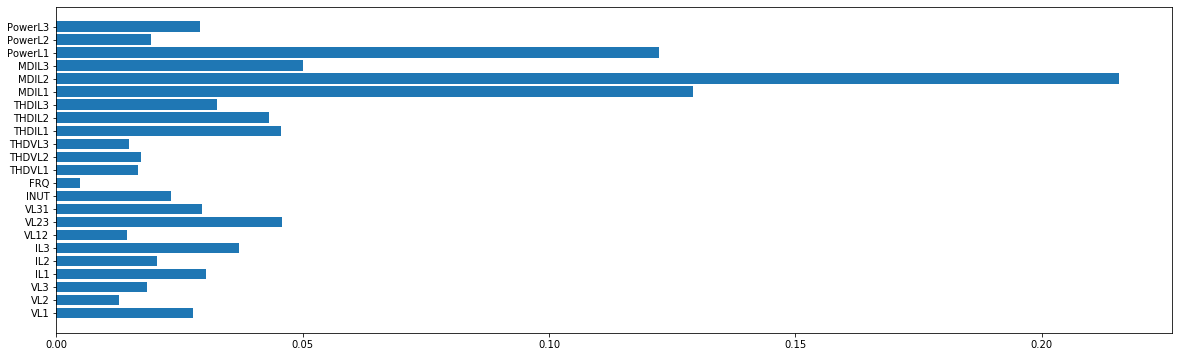

In [480]:

plt.figure(figsize=(20,6))
plt.barh(X_test_PFL_1_2_3.columns, model_PFL1.feature_importances_,)


From model PFL2

<BarContainer object of 23 artists>

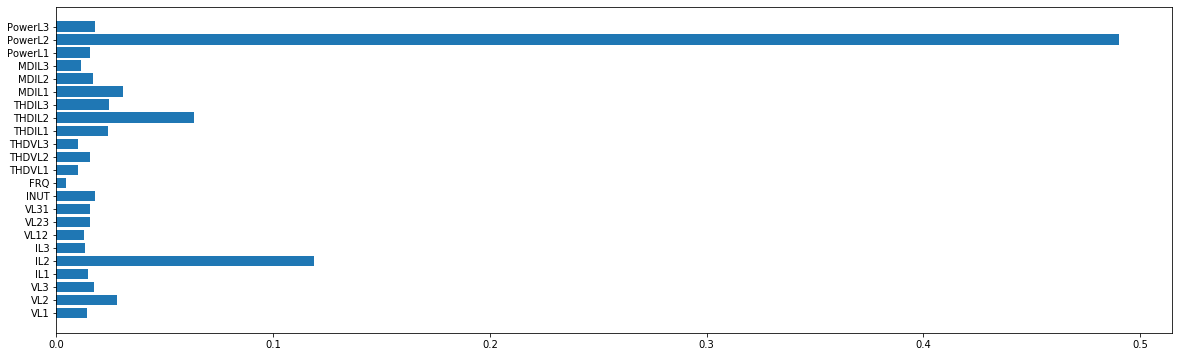

In [481]:

plt.figure(figsize=(20,6))
plt.barh(X_test_PFL_1_2_3.columns, model_PFL2.feature_importances_,)


From model PFL3

<BarContainer object of 23 artists>

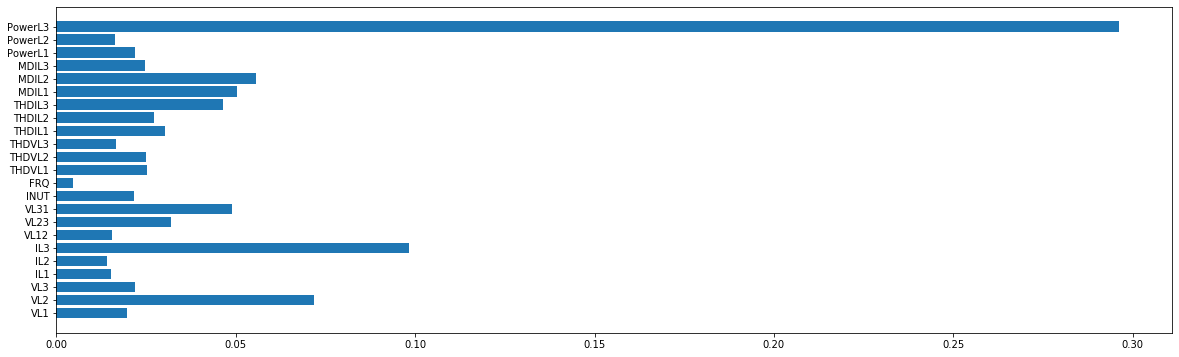

In [482]:

plt.figure(figsize=(20,6))
plt.barh(X_test_PFL_1_2_3.columns, model_PFL3.feature_importances_,)


In [413]:
score=r2_score(y_test_PFL_1_2_3['PFL1'],pre_randomForest_PFL1)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL_1_2_3['PFL1'],pre_randomForest_PFL1))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL_1_2_3['PFL1'],pre_randomForest_PFL1)))

r2 socre is == 0.736066170266336
mean_sqrd_error is== 0.2855139588899143
root_mean_squared error of is== 0.5343350623811939


In [414]:
score=r2_score(y_test_PFL_1_2_3['PFL2'],pre_randomForest_PFL2)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL_1_2_3['PFL2'],pre_randomForest_PFL2))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL_1_2_3['PFL2'],pre_randomForest_PFL2)))

r2 socre is == 0.7840668687965127
mean_sqrd_error is== 0.22022082746939237
root_mean_squared error of is== 0.46927691981322966


In [415]:
score=r2_score(y_test_PFL_1_2_3['PFL3'],pre_randomForest_PFL3)
print("r2 socre is ==",score)
print("mean_sqrd_error is==", mean_squared_error(y_test_PFL_1_2_3['PFL3'],pre_randomForest_PFL3))
print("root_mean_squared error of is==", np.sqrt(mean_squared_error(y_test_PFL_1_2_3['PFL3'],pre_randomForest_PFL3)))

r2 socre is == 0.7685818536608802
mean_sqrd_error is== 0.23396533761493354
root_mean_squared error of is== 0.4836996357399223


In [417]:
Predected_PFL1=pd.DataFrame(pre_randomForest_PFL1, columns=["PFL1"])
Predected_PFL2=pd.DataFrame(pre_randomForest_PFL2, columns=["PFL2"])
Predected_PFL3=pd.DataFrame(pre_randomForest_PFL3, columns=["PFL3"])

# Concating predictions of PFL1 PFL2 PFL3

In [418]:
int_resut=pd.concat([Predected_PFL1, Predected_PFL2,Predected_PFL3 ], axis=1)


In [419]:
int_resut

,PFL1,PFL2,PFL3
0,0.227203,-0.835873,-1.343260
1,0.384661,0.975076,0.687992
2,0.360058,-1.826813,0.351489
3,0.187838,-0.364657,-0.055373
4,0.173076,1.404714,1.370174
...,...,...,...
3395,0.389582,0.376816,0.011928
3396,-0.491201,0.730228,0.966371
3397,0.379740,0.413774,-0.814033
3398,0.389582,0.884990,0.470795


In [420]:
X_test_PFL_1_2_3.reset_index().drop('index', 1)

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
0,0.694307,0.654354,0.700737,-1.245764,-0.946586,-1.154174,0.685141,0.684573,0.674412,-1.099719,...,-0.723350,0.038960,0.403657,0.498009,0.021311,-0.117465,-0.010149,-1.279522,-0.960091,-1.228281
1,-1.916147,-2.059555,-1.888112,1.758884,2.225319,2.390755,-2.029523,-2.026739,-1.797679,0.295649,...,0.354840,-0.129578,0.305343,-0.286288,0.915087,1.858203,1.473688,1.631393,2.123673,2.298677
2,1.404167,1.418009,1.467339,-0.835908,-1.056435,-1.086758,1.435158,1.421421,1.423531,-0.182539,...,0.354840,0.525846,1.091854,1.177733,-0.957363,-0.734985,-0.623215,-0.785032,-1.096356,-1.055686
3,1.335471,1.359266,1.253696,-1.381420,-1.160792,-1.112039,1.342236,1.321267,1.300948,-0.276609,...,-0.543652,-0.447926,0.089053,0.158147,-2.563330,-2.253966,-3.061915,-1.406464,-1.178405,-1.094147
4,-0.267439,-0.309025,-0.191536,-2.307925,-1.751233,-2.538999,-0.283908,-0.266890,-0.224530,-2.244234,...,-0.184255,-2.301838,-2.506432,-2.482321,1.186286,0.245899,0.757540,-2.455200,-1.812329,-2.655242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.740104,0.677852,0.788708,-1.011973,-0.913631,-1.078331,0.724965,0.763266,0.735704,-0.754796,...,-1.442144,-1.271887,0.442982,-0.417005,1.186286,0.686701,0.757540,-1.018426,-0.905970,-1.080920
3396,-0.908604,-0.602738,-0.618822,1.597250,1.019721,0.803683,-0.775069,-0.567352,-0.898737,0.052635,...,-0.723350,-0.260662,-0.461505,-0.678437,1.058940,0.573522,0.752115,1.581535,1.082741,0.854610
3397,-0.725414,-0.614486,-0.794763,1.164304,0.662710,0.477842,-0.629048,-0.681813,-0.810205,-0.057113,...,0.714237,-0.204483,0.325006,-0.050999,0.021311,-0.117465,-0.010149,1.195483,0.683204,0.398190
3398,0.637060,0.642606,0.562498,-0.746432,-0.765334,-0.609232,0.638680,0.591573,0.619931,-0.041434,...,0.354840,1.724334,1.249156,0.759441,-0.992736,-0.762784,-0.620502,-0.730319,-0.735925,-0.547950


In [432]:
t=['VL1',
 'VL2',
 'VL3',
 'IL1',
 'IL2',
 'IL3',
 'VL12',
 'VL23',
 'VL31',
 'INUT',
 'PFL1',
 'PFL2',
 'PFL3',
 'Avg_PF',
 'Sum_PF',
 'FRQ',
 'THDVL1',
 'THDVL2',
 'THDVL3',
 'THDIL1',
 'THDIL2',
 'THDIL3',
 'MDIL1',
 'MDIL2',
 'MDIL3',
 'PowerL1',
 'PowerL2',
 'PowerL3']

In [433]:

o=pd.concat([X_test_PFL_1_2_3.reset_index().drop('index', 1), int_resut ], axis=1)[t]

In [435]:

d=pd.DataFrame(scaler.inverse_transform(o), columns=o.columns)

In [438]:
d

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3
0,247.4,246.3,245.6,36.8,29.3,49.3,427.6,425.7,427.7,14.6,...,1.4,12.5,14.8,11.4,157.1,135.2,175.8,27039.8304,20783.7792,33781.5432
1,224.6,223.2,225.0,140.9,144.8,175.5,386.7,387.8,391.4,32.4,...,2.0,11.6,14.3,8.4,195.0,234.7,230.5,93989.0358,95988.4992,117277.8750
2,253.6,252.8,251.7,51.0,25.3,51.7,438.9,436.0,438.7,26.3,...,2.0,15.1,18.3,14.0,115.6,104.1,153.2,38412.7920,17460.6432,37867.5099
3,253.0,252.3,250.0,32.1,21.5,50.8,437.5,434.6,436.9,25.1,...,1.5,9.9,13.2,10.1,47.5,27.6,63.3,24120.2610,15459.6825,36957.0000
4,239.0,238.1,238.5,0.0,0.0,0.0,413.0,412.4,414.5,0.0,...,1.7,0.0,0.0,0.0,206.5,153.5,204.1,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,247.8,246.5,246.3,44.9,30.5,52.0,428.2,426.8,428.6,19.0,...,1.0,5.5,15.0,7.9,206.5,175.7,204.1,33044.8734,22103.6550,37270.1160
3396,233.4,235.6,235.1,135.3,100.9,119.0,405.6,408.2,404.6,29.3,...,1.4,10.9,10.4,6.9,201.1,170.0,203.9,92842.3188,70602.9588,83091.3930
3397,235.0,235.5,233.7,120.3,87.9,107.4,407.8,406.6,405.9,27.9,...,2.2,11.2,14.4,9.3,157.1,135.2,175.8,83963.3850,60859.3230,72286.2144
3398,246.9,246.2,244.5,54.1,35.9,68.7,426.9,424.4,426.9,28.1,...,2.0,21.5,19.1,12.4,114.1,102.7,153.3,39671.1513,26250.5826,49887.5355


In [439]:
d[['PFL1', 'PFL2', 'PFL3']]

,PFL1,PFL2,PFL3
0,0.98835,0.95080,0.95095
1,0.98995,0.99000,0.98415
2,0.98970,0.92935,0.97865
3,0.98795,0.96100,0.97200
4,0.98780,0.99930,0.99530
...,...,...,...
3395,0.99000,0.97705,0.97310
3396,0.98105,0.98470,0.98870
3397,0.98990,0.97785,0.95960
3398,0.99000,0.98805,0.98060


In [440]:
temp=pd.DataFrame(d[['PFL1', 'PFL2', 'PFL3']].mean(axis=1), columns=["AVG Power factor from 3 Lines"])
#final_resut=pd.concat([int_resut, temp ], axis=1)

In [441]:
temp

,AVG Power factor from 3 Lines
0,0.963367
1,0.988033
2,0.965900
3,0.973650
4,0.994133
...,...
3395,0.980050
3396,0.984817
3397,0.975783
3398,0.986217


In [442]:
final_resut=pd.concat([d, temp ], axis=1)

In [443]:
final_resut.rename(columns={'PFL1': 'Predected_PFL1', 'PFL2': 'Predected_PFL2','PFL3': 'Predected_PFL3'}, inplace=True)

In [444]:
final_resut.columns

Index(['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31',
       'INUT', 'Predected_PFL1', 'Predected_PFL2', 'Predected_PFL3', 'Avg_PF',
       'Sum_PF', 'FRQ', 'THDVL1', 'THDVL2', 'THDVL3', 'THDIL1', 'THDIL2',
       'THDIL3', 'MDIL1', 'MDIL2', 'MDIL3', 'PowerL1', 'PowerL2', 'PowerL3',
       'AVG Power factor from 3 Lines'],
      dtype='object')

# prediction  columns are : Predected_PFL1, Predected_PFL2, Predected_PFL3 and AVG_Power_factor_from_3_Lines in csv file

In [445]:
final_resut

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3,PowerL1,PowerL2,PowerL3,AVG Power factor from 3 Lines
0,247.4,246.3,245.6,36.8,29.3,49.3,427.6,425.7,427.7,14.6,...,12.5,14.8,11.4,157.1,135.2,175.8,27039.8304,20783.7792,33781.5432,0.963367
1,224.6,223.2,225.0,140.9,144.8,175.5,386.7,387.8,391.4,32.4,...,11.6,14.3,8.4,195.0,234.7,230.5,93989.0358,95988.4992,117277.8750,0.988033
2,253.6,252.8,251.7,51.0,25.3,51.7,438.9,436.0,438.7,26.3,...,15.1,18.3,14.0,115.6,104.1,153.2,38412.7920,17460.6432,37867.5099,0.965900
3,253.0,252.3,250.0,32.1,21.5,50.8,437.5,434.6,436.9,25.1,...,9.9,13.2,10.1,47.5,27.6,63.3,24120.2610,15459.6825,36957.0000,0.973650
4,239.0,238.1,238.5,0.0,0.0,0.0,413.0,412.4,414.5,0.0,...,0.0,0.0,0.0,206.5,153.5,204.1,0.0000,0.0000,0.0000,0.994133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,247.8,246.5,246.3,44.9,30.5,52.0,428.2,426.8,428.6,19.0,...,5.5,15.0,7.9,206.5,175.7,204.1,33044.8734,22103.6550,37270.1160,0.980050
3396,233.4,235.6,235.1,135.3,100.9,119.0,405.6,408.2,404.6,29.3,...,10.9,10.4,6.9,201.1,170.0,203.9,92842.3188,70602.9588,83091.3930,0.984817
3397,235.0,235.5,233.7,120.3,87.9,107.4,407.8,406.6,405.9,27.9,...,11.2,14.4,9.3,157.1,135.2,175.8,83963.3850,60859.3230,72286.2144,0.975783
3398,246.9,246.2,244.5,54.1,35.9,68.7,426.9,424.4,426.9,28.1,...,21.5,19.1,12.4,114.1,102.7,153.3,39671.1513,26250.5826,49887.5355,0.986217


In [446]:
final_resut.to_csv("AVG_Power_factor_from_3_Lines.csv")